In [75]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt
from matplotlib import cm
from scipy.spatial.distance import cdist,pdist
from scipy.cluster.vq import kmeans

data = pd.read_csv("usuarios-twitter.csv")


features = data[['op', 'co', 'ne']]
output = data['categoria']

Text(0.5, 1.0, 'Elbow for KMeans clustering')

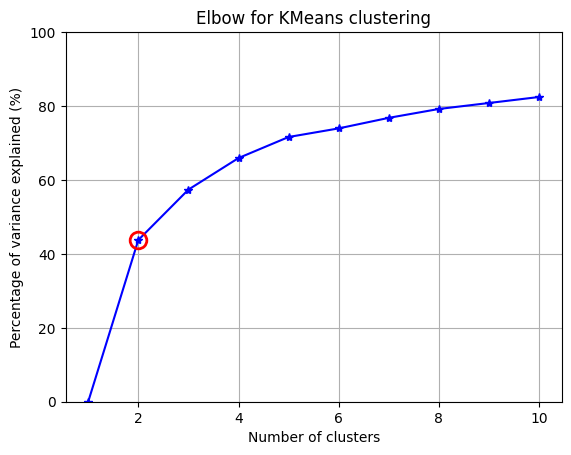

In [76]:

X = features
##### cluster data into K=1..20 clusters #####
K_MAX = 10
KK = range(1,K_MAX+1)

KM = [kmeans(X,k) for k in KK]
centroids = [cent for (cent,var) in KM]
D_k = [cdist(X, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]

tot_withinss = [sum(d**2) for d in dist]  # Total within-cluster sum of squares
totss = sum(pdist(X)**2)/X.shape[0]       # The total sum of squares
betweenss = totss - tot_withinss          # The between-cluster sum of squares

##### plots #####
kIdx = 1        # K=10
mrk = 'os^p<dvh8>+x.'

# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(KK, betweenss/totss*100, 'b*-')
ax.plot(KK[kIdx], betweenss[kIdx]/totss*100, marker='o', markersize=12,
    markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained (%)')
plt.title('Elbow for KMeans clustering')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

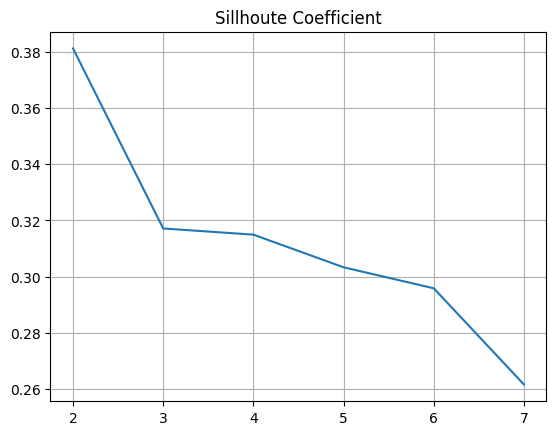

In [77]:

sillhoute_scores = []
n_cluster_list = np.arange(2,8).astype(int)

for n_cluster in n_cluster_list:

    kmeans = KMeans(n_clusters=n_cluster, random_state=5)
    cluster_found = kmeans.fit_predict(X)
    sillhoute_scores.append(silhouette_score(X, kmeans.labels_))

plt.plot(n_cluster_list,sillhoute_scores)
plt.xticks(range(2,8))
plt.title('Sillhoute Coefficient')
plt.grid()

In [86]:


n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=5)
kmeans.fit(X)




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=5)

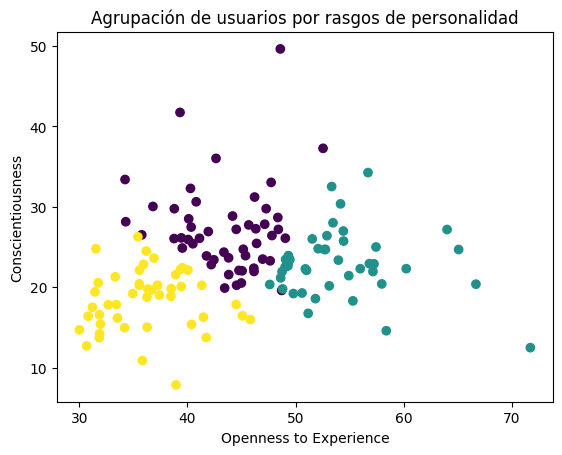

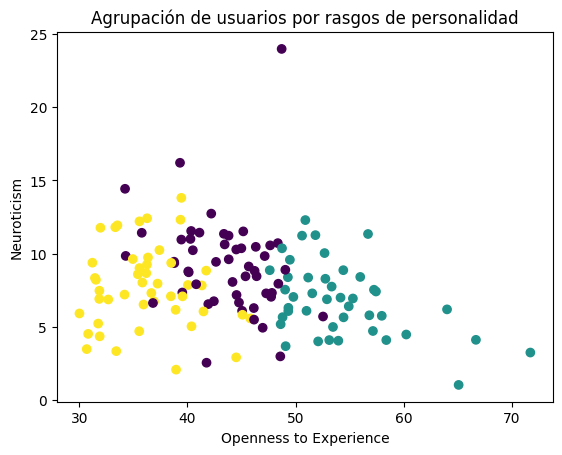

In [87]:
labels = kmeans.labels_

plt.scatter(features['op'], features['co'], c=labels, cmap='viridis')
plt.xlabel('Openness to Experience')
plt.ylabel('Conscientiousness')
plt.title('Agrupación de usuarios por rasgos de personalidad')
plt.show()


plt.scatter(features['op'], features['ne'], c=labels, cmap='viridis')
plt.xlabel('Openness to Experience')
plt.ylabel('Neuroticism')
plt.title('Agrupación de usuarios por rasgos de personalidad')
plt.show()

Grafica1:  Entre mas ordenados mas abiertos a a nuevas experiencias




Grafica2: No se puede interpretar con ese numero de clusters
